# Tarea 5 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

## Métodos de Integración.

### Integración por Método de Riemann

La **integral de Riemann** es una de las definiciones de Cálculo para integrar funciones de $[a,b]$ $\subset$ $\mathbb{R}$ $\rightarrow$ $\mathbb{R}$.

Dicho concepto se basa en las **particiones $P=\{a=t_0<t_1<...<t_n=b\}$ de un intervalo $[a,b]$** para generar rectángulos que se aproximen al área bajo la curva de la función $f$ **considerando la longitud de los subintervalos $[t_{i-1},t_i]$ y un conjunto de puntos $\{x_i\}^n_{i=1}$ los cuales cumplen que $x_i\in[t_{i-1},t_i)$**.

Dada una partición $P\subset\mathbb{P}_{[a,b]}$ se da el conjunto de puntos $\{x_i\}^n_{i=1}$ descrito anteriormente para dar una partición que los incluya sin afectar las longitudes de la $P$ que llamaremos **partición emparejada**:

$(P,\{x_i\})=P\cup\{x_i\}^n_{i=1}$.

Con la partición emparejada $(P,\{x_i\})$ generamos los subintervalos $[t_{i-1},t_i]$ que servirán como base de nuestros rectángulos y damos además el punto $x_i\in[t_{i-1},t_i)$ que servirá de altura para estos en cada subintervalo gracias a que los incluimos explícitamente en el conjunto $\{x_i\}^n_{i=1}$.

La suma de Riemann para la función $f$ en el intervalo $[a,b]$ dada la partición emparejada $(P,\{x_i\})$ se denota por la siguiente expresión:

$R(f,(P,\{x_i\}))=\sum_{i=1}^nf(x_i)(t_i-t_{i-1})$

Podemos notar que podemos mejorar la aproximación dada al área bajo la gráfica de la función reduciendo el tamaño de nuestros subintervalos generados. Dado que $P$ es arbitraria respecto a la distribución de puntos que la compone tenemos que la longitud de cada subintervalo $[t_{i-1},t_i]$ puede tomar valores distintos, por eso definimos la norma de la partición (o mesh) $||P||$ como la distancia máxima inducida por la partición $P$ en los subintervalos $[t_{i-1},t_i]$:

$||P||=max\{t_{i-1},t_i\}_{i=1}^n$

Con esto apreciamos que cuando $||P||\rightarrow0$ se cumple $[t_{i-1},t_i]\rightarrow0$, garantizando el punto propuesto en el párrafo anterior.

La utilidad del modelo de suma de Riemann surge cuando se tiene una función cuya integral en un intervalo $[a,b]$ no tenga una expresión analítica pues simplemente debemos seguir los siguientes pasos para dar un programa que nos arroje el valor de dicha integración:
* Considerar para correr el programa la función a evaluar y el intervalo de integración.
* Introducir una partición homogénea con un valor $||P||$ cercano a cero (algo del tipo $||P||=\displaystyle\frac{b-a}{n}$ funciona), dependiendo de que tan preciso se quiera ser.
* Proponer un valor fijo para cada $\{x_i\}^n_{i=1}$ en cada subintervalo, por ejemplo que sea el punto medio de cada subintervalo $\{x_i\}^n_{i=1}={\displaystyle\frac{t_i-t_{i-1}}{2}}$
* Establecer una iteración para dar el valor de $R(f,(P,\{x_i\}))$ considerando:
    * El número de subintervalos generados sabiendo que con $N$ puntos se inducen $N-1$ subintervalos.
    * El valor de $f(x_i)$ correspondiente a cada subintervalo.
    * Arrojar un mensaje de error en caso de tener una función indefinida en $[a,b]$ o bien que uno de los puntos de $\{x_i\}^n_{i=1}$ no esté definido.
    
Finalmente comparto la siguiente definición de integral de Riemann usando sumas de Riemann (pues también existe la construcción de integral por el método de Darboux):

**Definición**: Decimos que una función $f:[a,b]\rightarrow\mathbb{R}$ es Riemann Integrable $(f\in\mathbb{R-I})$ y $\int_a^b f(x)dx=s$ sí y sólo sí:

$\forall \varepsilon>0\ \ \exists\ \delta>0\ \ \centerdot\ni\centerdot\ \ si\ \ ||P||<\delta \Longrightarrow|R(f,(P,\{x_i\}))-s|<\varepsilon$

### Integración por Método de Trapecios

También conocida como **"Regla del trapecio compuesta" o "Regla de los Trapecios"** es una forma de dar una estimación a la integral para una función $f$ continua y definida positiva (o negativa) en un intervalo $[a,b]$. El método consiste en aproximar la gráfica de $f$ por medio de rectas definidas por los extremos de cada subintervalo inducido dada una partición $P$ de $[a,b]$ con las cuáles se pueden formar junto con los propios subintervalos trapecios rectángulos cuya suma de áreas se acercan al área bajo la gráfica:

$\int_a^b f(x)dx=\sum_iA_{Trapecios}$

Donde el área de un trapecio se denota por la siguiente expresión:

$Área=\displaystyle\frac{(b_1+b_2)h}{2}$

Siendo $b_i\ \ (i=1,2)$ las bases del trapecio y $h$ la altura, para nuestro interés $b_i$ son los valores de la función evaluada en los extremos de cada subintervalo evaluados y $h$ la longitud de cada subintervalo.

Para desarrollar de manera sencilla el método de trapecios damos una **partición homogénea** $P$ de $[a,b]$ tal que $||P||=\displaystyle\frac{b-a}{n}$ donde $n$ es el número de subintervalos a inducir deseados (tendremos una mejor aproximación si el valor de $n$ es muy grande). De aquí tendríamos haciendo $h=\displaystyle\frac{b-a}{2n}$:

$\int_a^b f(x)dx\approx h[(f(a)+f(a+h))+(f(a+h)+f(a+2h))+\ldots+(f(a+(n-2)h)+f(a+(n-1)h))+(f(a+(n-1)h)+f(b))]$

Esta igualdad la cuál solo expresa la suma de áreas se puede simplificar notando que $f(a)$ y $f(b)$ se repiten una vez mientras que la función evaluada en los puntos intermedios dados por la partición aparecen dos veces cada uno, quedando:

$\int_a^b f(x)dx\approx h[\displaystyle\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f(a+kh)]=\displaystyle\frac{b-a}{n}[\displaystyle\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f(a+k\displaystyle\frac{b-a}{n})]$

Cumpliéndose que:

$\int_a^b f(x)dx=\lim_{n\rightarrow\infty}\displaystyle\frac{b-a}{n}[\displaystyle\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f(a+k\displaystyle\frac{b-a}{n})]$

Pues $f$ es integrable en [a,b].

### Integración por Método de Simpson

Este método es parecido al Método de Trapecios, solo que en vez de aproximar por medio de polinomios de primer grado (pues las rectas se pueden expresar como funciones de este tipo en cada subintervalo generado por la partición $P$ elegida) lo hacemos por polinomios de segundo grado. Para esto ocuparemos polinomios de Lagrange que son aquellos que interpolan un conjunto de puntos dado. Este polinomio para el grado deseado es:

$P_2(x)=f(a)\displaystyle\frac{(x-m)(x-b)}{(a-m)(a-b)}+f(m)\displaystyle\frac{(x-a)(x-b)}{(m-a)(m-b)}+f(b)\displaystyle\frac{(x-a)(x-m)}{(b-a)(b-m)}$

Donde $a$ y $b$ son los extremos del intervalo donde aproximaremos y $m$ es un punto intermedio en el intervalo.

Entonces se tiene usando integración por substitución:

$\int_a^b f(x)dx\approx\int_a^b P_2(x)=\displaystyle\frac{b-a}{6}[f(a)+4f(m)+f(b)]$

Como en general $[a,b]$ no tiene por que tener una longitud pequeña para evitar un error considerable en la aproximación usando una partición $P$ homogénea de $[a,b]$ podremos acercarnos mejor al valor de la integral en cuestión. Sea entonces $P$ tal que $||P||=\displaystyle\frac{b-a}{n}$. con $i=1,2,...,n$, en el intervalo $[x_{j-1},x_{j+1}]\in[a,b]$ con $j=1,3,5,...,n-1$ tenemos:

$\int_{x_{j-1}}^{x_{j+1}} f(x)dx\approx\displaystyle\frac{x_{j+1}-x_{j-1}}{3}[f(x_{j-1})+4f(x_j)+f(x_{i+j})]$

Sumando todos los intervalos $[x_{j-1},x_{j+1}]\in[a,b]$ tendremos haciendo $h=\displaystyle\frac{b-a}{n}$:

$\int_a^b f(x)dx\approx\displaystyle\frac{h}{3}[f(x_0)+2\sum_{j=1}^{\small\displaystyle\frac{n}{2}-1}f(x_{2j})+4\sum_{j=1}^{\small\displaystyle\frac{n}{2}}f(x_{2j-1})+f(x_n)]$

# Tarea 6 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

## Integración por Método de Riemann

Implementando el proceso descrito en la parte de la Tarea 5 sobre este método:

In [65]:
using SymPy #Usaremos SymPy para esto

In [12]:
#Con este programa damos una aproximación a la integral de f(x) por Método de Riemann usando particiones homogéneas
#Se consideran 4 parámetros para dar una mayor libertad al usuario al momento de generar el valor de la integral:
# f -> Se da la función a integrar
# a -> Punto inicial del intervalo de integración
# b -> Punto final del intervalo de integración, por convención a<b
# n -> Cantidad de subintervalos inducidos deseados del intervalo [a,b] n natural
function integralriemann(f,a,b,n)
    x=symbols("x") #Declaramos la variable simbólica x
    longitud=abs((b-a)/n) #La longitud de cada subintervalo dada la partición
    g(x)=f(x) #La función f definida con la variable x
    st=0 #Acumulador del valor de la suma del área de los rectángulos en cada subintervalo
    for i in 1:n #Ciclo for, se detiene al completar los n subintervalos inducidos
        punto=((2*a)+longitud)/2 #Definimos el punto a evaluar en la función, este valor (para ejemplificar tomamos el punto medio de cada subintervalo)
        si=g(punto)*longitud #Hacemos el área del rectangulo inducido en el i-ésimo subintervalo
        st=st+si #Acumulamos el valor en st
        a=a+longitud #Para irnos al siguiente intervalo redefinimos el valor de a
    end
    return st #Muestra el valor final de la suma de Riemann finita
end     

integralriemann (generic function with 1 method)

In [71]:
f(x)=x^2 #Función prueba

f (generic function with 1 method)

In [72]:
typeof(ans)

#f

In [73]:
integralriemann(f,0,1,1000) #Prueba

0.3333332500000003

## Integración por Método de Trapecios

In [4]:
using SymPy #Usaremos SymPy para esto

In [17]:
#Con este programa damos una aproximación a la integral de f(x) por Método de Trapecios usando particiones homogéneas
#Se consideran 4 parámetros para dar una mayor libertad al usuario al momento de generar el valor de la integral:
# f -> Se da la función a integrar
# a -> Punto inicial del intervalo de integración
# b -> Punto final del intervalo de integración, por convención a<b
# n -> Cantidad de subintervalos inducidos deseados del intervalo [a,b] n natural
function integraltrapecios(f,a,b,n)
    x=symbols("x") #Declaramos la variable simbólica x
    longitud=abs((b-a)/n) #La longitud de cada subintervalo dada la partición
    g(x)=f(x) #La función f definida con la variable x
    factor=(f(a)+f(b))/2 #Factor que se suma a la suma parcial
    sp=0 #Acumulador representando la suma parcial
    for i in 1:(n-1) #Ciclo for para realizar la suma parcial que tiene como límite n-1
        argumento=a+(i*longitud) #Argumento a evaluar en f(x)
        sp=sp+g(argumento) #Suma parcial hasta la i-ésima iteración
    end
    st=longitud*(factor+sp) #Suma total con todos los valores definidos
    return st #Muestra el valor final de la iteración para trapecios
end     

integraltrapecios (generic function with 1 method)

In [6]:
f(x)=x^2 #Función prueba

f (generic function with 1 method)

In [7]:
typeof(ans)

#f

In [8]:
integraltrapecios(f,0,1,1000) #Prueba

0.33333349999999995

# Integración por Método de Simpson

In [2]:
using SymPy #Corremos SymPy

In [18]:
#Con este programa damos una aproximación a la integral de f(x) por Método de Simpson usando particiones homogéneas
#Se consideran 4 parámetros para dar una mayor libertad al usuario al momento de generar el valor de la integral:
# f -> Se da la función a integrar
# a -> Punto inicial del intervalo de integración
# b -> Punto final del intervalo de integración, por convención a<b
# n -> Cantidad de subintervalos inducidos deseados del intervalo [a,b] n natural
# El objetivo es aplicar el Método de Simpson en cada subintervalo e ir sumando
function integralsimpson(f,a,b,n)
    x=symbols("x") #Declaramos la variable simbólica x
    longitud=abs((b-a)/n) #La longitud de cada subintervalo dada la partición
    g(x)=f(x) #La función f definida con la variable x
    st=0 #Acumulador de los valores de las integrales en cada subintervalo
    c=a+longitud #Variable que nos define el supremo (punto final) de cada subintevralo
    for i in 1:n #Ciclo for que corre de 1 a n para evaluar los n intervalos
        aint=((c-a)/6)*(f(a)+4f((a+c)/2)+f(c)) #Aplicando Método de Simpson en cada subintervalo
        st=st+aint #Representación de la suma parcial a la iésima iteración
        a=c #Redefinimos a para analizar el proximo intervalo
        c=c+longitud #Redefinimos c para analizar el proximo intervalo
    end #Fin de for
    return st #Arrojar el resultado de st
end #Fin

integralsimpson (generic function with 1 method)

In [18]:
f(x)=x^2 #Función prueba

f (generic function with 1 method)

In [19]:
integralsimpson(f,0,1,1000)

0.33333333333333415

# Tarea 7 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

# Interpolación polinomial en la forma de Lagrange

Dado un conjunto de $k+1$ puntos

$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$

donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal

$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$

de las bases polinomiales de Lagrange

$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$


In [3]:
using SymPy  #Ocupamos SymPy

In [4]:
x0=linspace(0,2*pi,10) #Generamos una lista a evaluar en x, con intervalos regulares

0.0:0.6981317007977318:6.283185307179586

In [5]:
#Esta función genera los puntos en y a partir de una función de nuestro agrado f(x)
function generadorlistay(f,x0)
    x=symbols("x") #Declaramos la variable simbólica
    g(x)=f(x) #Función en términos de x
    a=g(x0) #Evaluamos el valor introducido
    return a #Arrojamos la lista de valores
end    

generadorlistay (generic function with 1 method)

In [6]:
f(x)=cos.(x) #Función que evalua listas (por eso el ".")

f (generic function with 1 method)

In [7]:
generadorlistay(f,x0) #Prueba

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [9]:
function interpolacion(x,y,x0)
    #Declaramos la variable simbólica w (estan ocupadas ya x,y)
    z=Sym("z")
    #Aquí sabremos la longitud de la lista generada con linspace x0 y podremos usarlo como control de los ciclos de base y suma
    k=length(x)
    #A continuación declaramos donde se guardarán las bases polinomiales generadas tipo arreglo.
    l=[]
    #Con esto generaremos la interpolación
    Lagrange=0
    for j in 1:k #Ciclo generador de las bases
        #Declaramos la variable g que generará las bases y le asignamos el valor inicial de 1
        g=1
        #Partiremos la iteración de bases con dos for: uno de 1 a j-1 y otro de j+1 hasta k, esto para cumplir la fórmula evitando la igualdad m=j y con ello la indeterminación correspondiente
        for m in 1:j-1 #Ciclo de 1 -> j-1
            g=g*(z-x[m])/(x[j]-x[m])   # Fórmula para obtener las bases, es una multiplicación de j-1 elementos
        end
        for m in j+1:k #Ciclo de j-1 -> k
            g=g*(z-x[m])/(x[j]-x[m])   #Aquí obtendremos la multiplicación de los k-1 elementos correspondientes
        end
        #Generada la base, la incluiremos en el arreglo
        push!(l,g)
    #Hemos generado todas las bases requeridas
    end
    for j in 1:k #Ciclo for de 1 a k que representa la interpolación de Lagrange
        Lagrange=Lagrange+y[j]*l[j]       #Fórmula de dicha interpolación
    end
    #Convertimos "Lagrange" a Julia para evaluarla en nuestro punto de interés
    #Global permitirá invocar a L en otros códigos dentro de este notebook
    global L=lambdify(Lagrange,[z])
    #Damos el valor de la interpolación en x0
    return Lagrange(x0)
#Fin de programa
end

interpolacion (generic function with 1 method)

In [10]:
interpolacion(x0,generadorlistay(f,x0),0) #Prueba

  likely near In[10]:1
  likely near In[10]:1
  likely near In[10]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


1.00000000000000

In [26]:
using PyPlot #Invocamos PyPlot

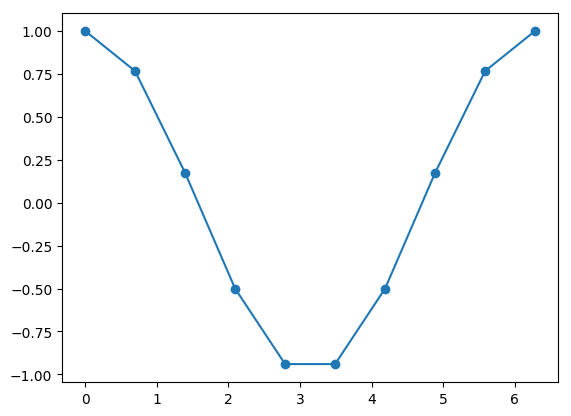

In [12]:
#Graficamos: Scatter con los elementos de las listas, Plot usando lo obtenido en las interpolaciones
scatter(x0,generadorlistay(f,x0))
plot(x0,L(x0));

Aquí notamos el comportamiento de la interpolación al variar el punto de interés.
Notemos que cercanos a $\pi$ la partición hace una mala aproximación al cero, esto se mejoraría si tuvieramos una norma de partición más fina.

Para la función $cos^2(x)$:

In [13]:
g(x)=(cos.(x)).^2 #Declaramos función

g (generic function with 1 method)

In [14]:
generadorlistay(g,x0) #Evaluamos los elementos de la lista

10-element Array{Float64,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [15]:
interpolacion(x0,generadorlistay(g,x0),0) #Aplicamos la interpolación

  likely near In[15]:1
  likely near In[15]:1
  likely near In[15]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


1.00000000000000

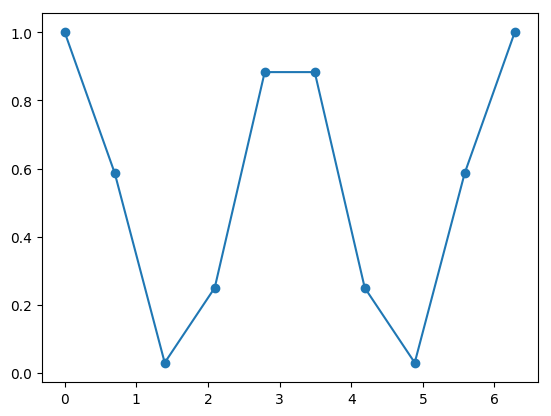

In [16]:
#Graficamos usando PyPlot
scatter(x0,g(x0))
plot(x0,L(x0));

Interpolación de [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]

In [102]:
x=[0,2,3,4,5,6,7] #Arreglo de entradas en x

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [103]:
y=[10,-10,-4,0,5,20,-1] #Arreglo de entradas en y

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [104]:
interpolacion(x,y,0) #Interpolación evaluada en x,y

10

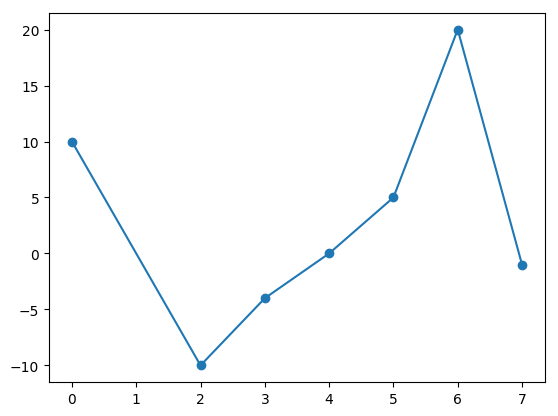

In [107]:
#Graficamos
scatter(x,y);
plot(x,L(x));

# Convergencia de los métodos de integración

In [34]:
#Para graficar la convergencia de los métodos de integración proponemos una función que evalue simultáneamente los parámetros deseados aprovechando que todas con función de f {función}, a {infimo del intervalo a evaluar}, b {máximo del intervalo a evaluar} y n {cantidad de subintervalos inducidos por la partición del intervalo de integración}
function convergencia(f,a,b,n)
    #Se declaran arreglos que almacenarán los valores de los tres métodos distintos
    R=[] #Riemann
    T=[] #Trapecios
    S=[] #Simpson
    #Se adjunta una variable que almacenará el inverso de la longitud de cada subintervallo (b-a)/n es decir n/(b-a)
    h=[] #n/(b-a) para cada subintervalo
    #Declaramos la variable simbólica x
    x=Sym("x")
    g=f(x) #Función simbólica g
    I=ones(length(n))*integrate(g,(x,a,b)) # Vector columna cuyas entradas son todas el valor exacto de la integral. 
    for i in 1:length(n)   # El ciclo sirve para calcular para los subintervalos la integral por los métodos propuestos. 
        push!(R,integralriemann(f,a,b,n[i])) #Agregamos el valor por Riemann a R
        push!(T,integraltrapecios(f,a,b,n[i])) #Agregamos el valor por Trapecios a T
        push!(S,integralsimpson(f,a,b,n[i])) #Agregamos el valor por Simpson a S
        push!(h,n[i]/(b-a)) #Agregamos la inversa del ancho del intervalo
    end
    return R,T,S,h,I   #Se regresa un vector con primera entrada R, segunda T, tercer S, cuarta h y quinta I.
end;

In [35]:
f(x)=-sin(x) #Función de prueba

f (generic function with 1 method)

In [36]:
n=1:10 #El valor de n fluctuará de 1 a 10

1:10

In [39]:
V=convergencia(f,0,2*pi,n) #Prueba de la función C

(Any[-7.69468e-16, 0.0, 6.66134e-16, 2.22045e-16, -2.22045e-16, -3.33067e-16, 0.0, 5.55112e-17, 4.996e-16, -1.66533e-16], Any[7.69468e-16, 0.0, -2.0856e-16, -1.5642e-16, 1.43789e-17, 2.44507e-16, 2.09577e-16, 2.70577e-16, 7.98829e-18, 7.69468e-17], Any[-2.56489e-16, 0.0, 4.44089e-16, 2.22045e-16, -2.22045e-16, 2.22045e-16, 0.0, 5.55112e-17, 0.0, -1.38778e-16], Any[0.159155, 0.31831, 0.477465, 0.63662, 0.795775, 0.95493, 1.11408, 1.27324, 1.43239, 1.59155], SymPy.Sym[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

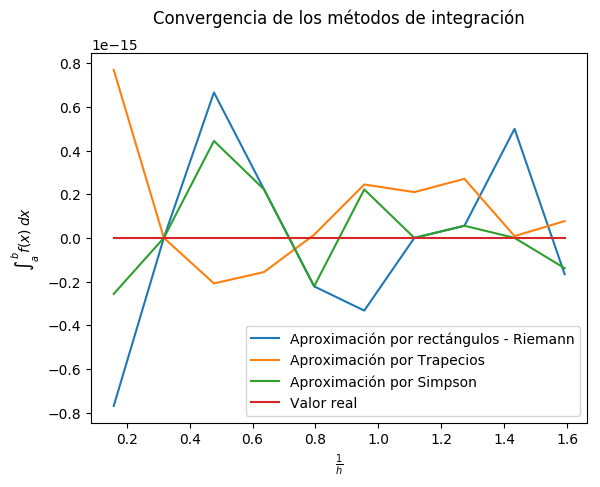

In [42]:
xlabel(L"$\frac{1}{h}$")
ylabel(L"$\int_{a}^{b}f(x)\:dx$")
title("Convergencia de los métodos de integración\n")
plot(V[4],V[1],label="Aproximación por rectángulos - Riemann")
plot(V[4],V[2],label="Aproximación por Trapecios")
plot(V[4],V[3],label="Aproximación por Simpson")
plot(V[4],V[5],label="Valor real")
legend()
show();

Aqui observamos que los tres métodos trabajados presentan un comportamiento oscilatorio alrededor del valor real de la integral definida. El método de Riemann es el que presenta un comportamiento más inestable conforme avanzamos a valores más grandes de $1/h$ (para valores menores de $h$ significa subintervalos inducidos más pequeños) a comparación del método de Trapecios y Simpson  siendo este último método el más estable. 

FIN